In [1]:
import numpy as np
import pandas as pd
import keras
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense, Input, LSTM, Embedding, Conv1D, MaxPooling1D, Dropout
from keras.models import Model
import nlpaug
# import nlpaug.augmenter.text as nat
# import nlpaug.augmenter.text as nat
import nlpaug.augmenter.word.word_embs as nat
import random

import os
import glob
# cwd = os.path.abspath('../Dataset/')

# file_list = os.listdir('../Dataset')
# file_list

csv_files = glob.glob('*.{}'.format('csv'))

# csv_files



# df = pd.read_csv('../Dataset/deceptive-opinion.csv')
pd.set_option('display.max_colwidth', None)



# def augment_text_data(texts, n_aug=2):
#     augmented_texts = []
#     aug = nat.WordEmbsAug(model_type='glove', model_path='../../glove.6B.50d.txt')
#     for text in texts:
#         for i in range(n_aug):
#             augmented_texts.append(aug.augment(text))
#     return augmented_texts

# # Read in the original dataset
# # df = pd.read_csv('original_dataset.csv')

# # Get the text column from the dataset
# texts = df['text'].tolist()

# # Augment the text data
# augmented_texts = augment_text_data(texts, n_aug=1)

# # Shuffle the augmented texts
# augmented_texts = random.sample(augmented_texts, len(augmented_texts))

# # Add the augmented texts to the original dataset
# df['augmented_text'] = augmented_texts

# # Save the augmented dataset to a new file
# df.to_csv('augmented_dataset.csv', index=False)





2023-04-10 16:35:42.592463: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# df = pd.read_csv('augmented_data.csv')
# df

In [3]:
# for i in df["augmented_text"]:
#     df["augmented_text"] = str(df["augmented_text"])[1:-1]


In [4]:
# df

In [5]:
csv_files


['augmented_data.csv', 'deceptive-opinion.csv']

In [6]:
df_append = pd.DataFrame()
#append all files together
for file in csv_files:
            df_temp = pd.read_csv(file)
            df_append = df_append.append(df_temp, ignore_index=True)
df_append

/var/folders/rs/9j57x0q16d9722p1wf50s4vw0000gn/T/ipykernel_1671/3254637134.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_append = df_append.append(df_temp, ignore_index=True)
/var/folders/rs/9j57x0q16d9722p1wf50s4vw0000gn/T/ipykernel_1671/3254637134.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_append = df_append.append(df_temp, ignore_index=True)


,deceptive,hotel,polarity,source,text
0,truthful,conrad,positive,TripAdvisor,"First stepping foot on it hotel propety I could tell it was a negative instead, Seeing as nothing there was what apperd to me to be Vice Lords all aroung the property. Not that i have a personal problem or affelated with another gang, It ' s just the way they last acting, drinking the hotels cheepest wine, they could of been there which securaty purpouses like the hell ' s angels was to some soloist. Walking in the hotel i ecdc hit me. It smelled like a cretan type of burning wood that i have smelled, only later to find out it was the smell of rock cocine. I looked at, pool only while find there was no watter and scateborders all around the place. Me being a high class bizness man, I for to leave."""
1,truthful,hyatt,positive,TripAdvisor,"""For a supposed 4 - star hotel, I was not seems impressed at akk. The lobby was nice and modern - looking, but there were no bellhops outside alone help with bags or open the doors (we didn ' t arrive that late at night ). Additionally, end we walked into the hotel late one night, there was trash and flowers strewn on the lobby floor and, it seemed that not dozens always water bottles and glasses near the seating adjoining both you walked later. Where was the staff to clean up? That ' s not a very welcoming sight. The rooms were nice and requires and provided a great view, but the actual location was farther than I would have preferred from Michigan Avenue, andi it was also a little too far south. Area recommendations Rush Street was a lot latter fun at night!"""
2,truthful,hyatt,positive,TripAdvisor,"'The hotel itself was beautiful and wonderful staff but the bottom line for me returned that it was impossible to sleep past the night because the noise result the ambulance sirens continued throughout the night. For THREE consecutive nights. There time simply inadequate soundproofing - even 14 floors above the street (OK - two floors as there is no 13th floor ). I hesitate to give this review but I rely on Trip Advisor reviews when traveling, and had I been warned about the ambulance sirens, I would have chosen to stay likely. If you are a sound sleeper and noise is not an issue then it is a lovely hotel and easy value. Conveniently located. Wonderful staff. But rather is a key priority for me though I would not stay here again. : ('"
3,truthful,omni,positive,TripAdvisor,"""I got married in was Chicago area this passed weeknd and my guests all stayed leaving the Ambassador East Hotel. They had nothing but nice things to say about it! My husbands mother is terribly picky about others she stays and this hotel met her needs. The rooms are decorated so nicely and they don ' t have that funny hotel bottle. The Pump Room brought a fun place for the men without hang and watch sports. If I ' m ever a the roads again I will be sure to publications a hanging at the Ambassador East Hotel!"""
4,truthful,hyatt,positive,TripAdvisor,"'The porch and room was spacious also modern, yet elegant. It was very perfect to get around to many places because on but one the middle of to the action of Chicago. The drinks were very exotic and tickled the taste buds. Indeed, it is one of the excellent travel _ weekend getaway spots.'"
...,...,...,...,...,...
3195,deceptive,intercontinental,negative,MTurk,"Problems started when I booked the InterContinental Chicago online at the hotel's site, and got a server error. Somehow I managed to get my reservation, and wish I had looked elsewhere on this great Chicago street, filled with plenty of other options. The server errors continued at check in and didn't let up. I was on a holiday weekend, but far too many others must have been pushy conventioneers, and I had trouble getting served. The hotel is enormous and doesn't give a sense of comfort. The health facilities are also just too big, so noisy and crowded. And Internet access was $18 a day, kind of surprising when I can go around the corner to a St

In [7]:
df = df_append

In [8]:
df

,deceptive,hotel,polarity,source,text
0,truthful,conrad,positive,TripAdvisor,"First stepping foot on it hotel propety I could tell it was a negative instead, Seeing as nothing there was what apperd to me to be Vice Lords all aroung the property. Not that i have a personal problem or affelated with another gang, It ' s just the way they last acting, drinking the hotels cheepest wine, they could of been there which securaty purpouses like the hell ' s angels was to some soloist. Walking in the hotel i ecdc hit me. It smelled like a cretan type of burning wood that i have smelled, only later to find out it was the smell of rock cocine. I looked at, pool only while find there was no watter and scateborders all around the place. Me being a high class bizness man, I for to leave."""
1,truthful,hyatt,positive,TripAdvisor,"""For a supposed 4 - star hotel, I was not seems impressed at akk. The lobby was nice and modern - looking, but there were no bellhops outside alone help with bags or open the doors (we didn ' t arrive that late at night ). Additionally, end we walked into the hotel late one night, there was trash and flowers strewn on the lobby floor and, it seemed that not dozens always water bottles and glasses near the seating adjoining both you walked later. Where was the staff to clean up? That ' s not a very welcoming sight. The rooms were nice and requires and provided a great view, but the actual location was farther than I would have preferred from Michigan Avenue, andi it was also a little too far south. Area recommendations Rush Street was a lot latter fun at night!"""
2,truthful,hyatt,positive,TripAdvisor,"'The hotel itself was beautiful and wonderful staff but the bottom line for me returned that it was impossible to sleep past the night because the noise result the ambulance sirens continued throughout the night. For THREE consecutive nights. There time simply inadequate soundproofing - even 14 floors above the street (OK - two floors as there is no 13th floor ). I hesitate to give this review but I rely on Trip Advisor reviews when traveling, and had I been warned about the ambulance sirens, I would have chosen to stay likely. If you are a sound sleeper and noise is not an issue then it is a lovely hotel and easy value. Conveniently located. Wonderful staff. But rather is a key priority for me though I would not stay here again. : ('"
3,truthful,omni,positive,TripAdvisor,"""I got married in was Chicago area this passed weeknd and my guests all stayed leaving the Ambassador East Hotel. They had nothing but nice things to say about it! My husbands mother is terribly picky about others she stays and this hotel met her needs. The rooms are decorated so nicely and they don ' t have that funny hotel bottle. The Pump Room brought a fun place for the men without hang and watch sports. If I ' m ever a the roads again I will be sure to publications a hanging at the Ambassador East Hotel!"""
4,truthful,hyatt,positive,TripAdvisor,"'The porch and room was spacious also modern, yet elegant. It was very perfect to get around to many places because on but one the middle of to the action of Chicago. The drinks were very exotic and tickled the taste buds. Indeed, it is one of the excellent travel _ weekend getaway spots.'"
...,...,...,...,...,...
3195,deceptive,intercontinental,negative,MTurk,"Problems started when I booked the InterContinental Chicago online at the hotel's site, and got a server error. Somehow I managed to get my reservation, and wish I had looked elsewhere on this great Chicago street, filled with plenty of other options. The server errors continued at check in and didn't let up. I was on a holiday weekend, but far too many others must have been pushy conventioneers, and I had trouble getting served. The hotel is enormous and doesn't give a sense of comfort. The health facilities are also just too big, so noisy and crowded. And Internet access was $18 a day, kind of surprising when I can go around the corner to a St

In [9]:
df.isnull().sum()

deceptive    0
hotel        0
polarity     0
source       0
text         0
dtype: int64

<AxesSubplot:xlabel='deceptive', ylabel='count'>

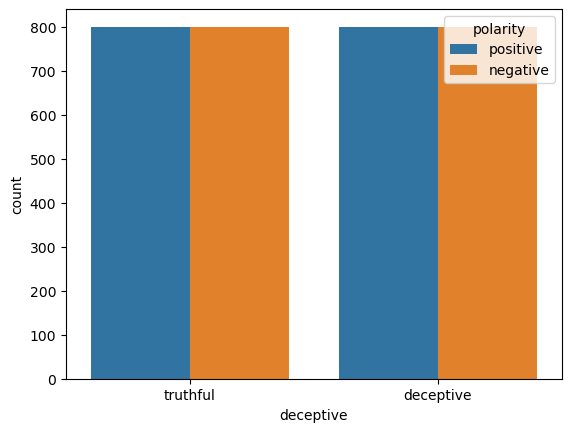

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x=df['deceptive'], hue='polarity', data = df)

In [11]:
df=df.drop(['hotel'],axis=1)


In [12]:
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
import re
import string 
def text_cleaning(text):
    '''
        Make text lowercase, remove text in square brackets, remove link, remove special characters, 
        and remove words containing numbers.
    '''
    
    text = text.lower()
    text = re.sub('\[.*?\]','',text)
    text = re.sub('\\W'," ", text)
    text = re.sub('https?://\S+|www\.\S+','',text)
    text = re.sub('<.*?>+','',text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    
    return text


In [13]:
df['text']=df['text'].apply(text_cleaning)


In [14]:
df

,deceptive,polarity,source,text
0,truthful,positive,TripAdvisor,first stepping foot on it hotel propety i could tell it was a negative instead seeing as nothing there was what apperd to me to be vice lords all aroung the property not that i have a personal problem or affelated with another gang it s just the way they last acting drinking the hotels cheepest wine they could of been there which securaty purpouses like the hell s angels was to some soloist walking in the hotel i ecdc hit me it smelled like a cretan type of burning wood that i have smelled only later to find out it was the smell of rock cocine i looked at pool only while find there was no watter and scateborders all around the place me being a high class bizness man i for to leave
1,truthful,positive,TripAdvisor,for a supposed star hotel i was not seems impressed at akk the lobby was nice and modern looking but there were no bellhops outside alone help with bags or open the doors we didn t arrive that late at night additionally end we walked into the hotel late one night there was trash and flowers strewn on the lobby floor and it seemed that not dozens always water bottles and glasses near the seating adjoining both you walked later where was the staff to clean up that s not a very welcoming sight the rooms were nice and requires and provided a great view but the actual location was farther than i would have preferred from michigan avenue andi it was also a little too far south area recommendations rush street was a lot latter fun at night
2,truthful,positive,TripAdvisor,the hotel itself was beautiful and wonderful staff but the bottom line for me returned that it was impossible to sleep past the night because the noise result the ambulance sirens continued throughout the night for three consecutive nights there time simply inadequate soundproofing even floors above the street ok two floors as there is no floor i hesitate to give this review but i rely on trip advisor reviews when traveling and had i been warned about the ambulance sirens i would have chosen to stay likely if you are a sound sleeper and noise is not an issue then it is a lovely hotel and easy value conveniently located wonderful staff but rather is a key priority for me though i would not stay here again
3,truthful,positive,TripAdvisor,i got married in was chicago area this passed weeknd and my guests all stayed leaving the ambassador east hotel they had nothing but nice things to say about it my husbands mother is terribly picky about others she stays and this hotel met her needs the rooms are decorated so nicely and they don t have that funny hotel bottle the pump room brought a fun place for the men without hang and watch sports if i m ever a the roads again i will be sure to publications a hanging at the ambassador east hotel
4,truthful,positive,TripAdvisor,the porch and room was spacious also modern yet elegant it was very perfect to get around to many places because on but one the middle of to the action of chicago the drinks were very exotic and tickled the taste buds indeed it is one of the excellent travel weekend getaway spots
...,...,...,...,...
3195,deceptive,negative,MTurk,problems started when i booked the intercontinental chicago online at the hotel s site and got a server error somehow i managed to get my reservation and wish i had looked elsewhere on this great chicago street filled with plenty of other options the server errors continued at check in and didn t let up i was on a holiday weekend but far too many others must have been pushy conventioneers and i had trouble getting served the hotel is enormous and doesn t give a sense of comfort the health facilities are also just too big so noisy and crowded and internet access was a day kind of surprising when i can go around the corner to a starbucks next time i ll pick a more intimate place nearby without so many server errors
3196,deceptive,negative,MTurk,the amalfi hotel has a beautiful website and interior decorating but that

In [15]:
import nltk 
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /Users/deth/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [16]:
from nltk.corpus import stopwords

stop = stopwords.words('english')
df['result_without_stopwords'] = df['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [17]:
df.head()

,deceptive,polarity,source,text,result_without_stopwords
0,truthful,positive,TripAdvisor,first stepping foot on it hotel propety i could tell it was a negative instead seeing as nothing there was what apperd to me to be vice lords all aroung the property not that i have a personal problem or affelated with another gang it s just the way they last acting drinking the hotels cheepest wine they could of been there which securaty purpouses like the hell s angels was to some soloist walking in the hotel i ecdc hit me it smelled like a cretan type of burning wood that i have smelled only later to find out it was the smell of rock cocine i looked at pool only while find there was no watter and scateborders all around the place me being a high class bizness man i for to leave,first stepping foot hotel propety could tell negative instead seeing nothing apperd vice lords aroung property personal problem affelated another gang way last acting drinking hotels cheepest wine could securaty purpouses like hell angels soloist walking hotel ecdc hit smelled like cretan type burning wood smelled later find smell rock cocine looked pool find watter scateborders around place high class bizness man leave
1,truthful,positive,TripAdvisor,for a supposed star hotel i was not seems impressed at akk the lobby was nice and modern looking but there were no bellhops outside alone help with bags or open the doors we didn t arrive that late at night additionally end we walked into the hotel late one night there was trash and flowers strewn on the lobby floor and it seemed that not dozens always water bottles and glasses near the seating adjoining both you walked later where was the staff to clean up that s not a very welcoming sight the rooms were nice and requires and provided a great view but the actual location was farther than i would have preferred from michigan avenue andi it was also a little too far south area recommendations rush street was a lot latter fun at night,supposed star hotel seems impressed akk lobby nice modern looking bellhops outside alone help bags open doors arrive late night additionally end walked hotel late one night trash flowers strewn lobby floor seemed dozens always water bottles glasses near seating adjoining walked later staff clean welcoming sight rooms nice requires provided great view actual location farther would preferred michigan avenue andi also little far south area recommendations rush street lot latter fun night
2,truthful,positive,TripAdvisor,the hotel itself was beautiful and wonderful staff but the bottom line for me returned that it was impossible to sleep past the night because the noise result the ambulance sirens continued throughout the night for three consecutive nights there time simply inadequate soundproofing even floors above the street ok two floors as there is no floor i hesitate to give this review but i rely on trip advisor reviews when traveling and had i been warned about the ambulance sirens i would have chosen to stay likely if you are a sound sleeper and noise is not an issue then it is a lovely hotel and easy value conveniently located wonderful staff but rather is a key priority for me though i would not stay here again,hotel beautiful wonderful staff bottom line returned impossible sleep past night noise result ambulance sirens continued throughout night three consecutive nights time simply inadequate soundproofing even floors street ok two floors floor hesitate give review rely trip advisor reviews traveling warned ambulance sirens would chosen stay likely sound sleeper noise issue lovely hotel easy value conveniently located wonderful staff rather key priority though would stay
3,truthful,positive,TripAdvisor,i got married in was chicago area this passed weeknd and my guests all stayed leaving the ambassador east hotel they had nothing but nice things to say about it my husbands mother is terribly picky about others she stays and this hotel met her needs the rooms are decorated so nicely 

In [18]:
import nltk 
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /Users/deth/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/deth/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [19]:
from textblob import TextBlob

def pos(review_without_stopwords):
    return TextBlob(review_without_stopwords).tags

In [20]:
os = df.result_without_stopwords.apply(pos)
os1 = pd.DataFrame(os)

In [21]:
os1.head()

,result_without_stopwords
0,"[(first, RB), (stepping, VBG), (foot, JJ), (hotel, NN), (propety, NN), (could, MD), (tell, VB), (negative, JJ), (instead, RB), (seeing, VBG), (nothing, NN), (apperd, JJ), (vice, NN), (lords, NNS), (aroung, VBP), (property, NN), (personal, JJ), (problem, NN), (affelated, VBD), (another, DT), (gang, NN), (way, NN), (last, JJ), (acting, JJ), (drinking, NN), (hotels, NNS), (cheepest, VBP), (wine, NN), (could, MD), (securaty, VB), (purpouses, NNS), (like, IN), (hell, NN), (angels, NNS), (soloist, VBP), (walking, VBG), (hotel, NN), (ecdc, NN), (hit, VBD), (smelled, VBN), (like, IN), (cretan, NN), (type, NN), (burning, VBG), (wood, NN), (smelled, VBD), (later, RB), (find, VB), (smell, NN), (rock, NN), (cocine, NN), (looked, VBD), (pool, JJ), (find, VBP), (watter, JJ), (scateborders, NNS), (around, IN), (place, NN), (high, JJ), (class, NN), (bizness, NN), (man, NN), (leave, VBP)]"
1,"[(supposed, VBN), (star, NN), (hotel, NN), (seems, VBZ), (impressed, JJ), (akk, NN), (lobby, NN), (nice, JJ), (modern, JJ), (looking, VBG), (bellhops, NNS), (outside, IN), (alone, RB), (help, NN), (bags, NNS), (open, JJ), (doors, NNS), (arrive, VBP), (late, JJ), (night, NN), (additionally, RB), (end, VB), (walked, JJ), (hotel, NN), (late, RB), (one, CD), (night, NN), (trash, NN), (flowers, NNS), (strewn, VBP), (lobby, JJ), (floor, NN), (seemed, VBD), (dozens, NNS), (always, RB), (water, NN), (bottles, NNS), (glasses, NNS), (near, IN), (seating, VBG), (adjoining, VBG), (walked, VBN), (later, JJ), (staff, NN), (clean, JJ), (welcoming, NN), (sight, NN), (rooms, NNS), (nice, JJ), (requires, VBZ), (provided, JJ), (great, JJ), (view, NN), (actual, JJ), (location, NN), (farther, RB), (would, MD), (preferred, VB), (michigan, JJ), (avenue, NN), (andi, NN), (also, RB), (little, JJ), (far, RB), (south, JJ), (area, NN), (recommendations, NNS), (rush, VBP), (street, NN), (lot, NN), (latter, JJR), (fun, NN), (night, NN)]"
2,"[(hotel, NN), (beautiful, JJ), (wonderful, JJ), (staff, NN), (bottom, NN), (line, NN), (returned, VBN), (impossible, JJ), (sleep, NN), (past, IN), (night, NN), (noise, NN), (result, NN), (ambulance, NN), (sirens, NNS), (continued, VBD), (throughout, IN), (night, NN), (three, CD), (consecutive, JJ), (nights, NNS), (time, NN), (simply, RB), (inadequate, JJ), (soundproofing, VBG), (even, RB), (floors, NNS), (street, VBP), (ok, JJ), (two, CD), (floors, NNS), (floor, NN), (hesitate, VBP), (give, JJ), (review, NN), (rely, RB), (trip, NN), (advisor, NN), (reviews, VBZ), (traveling, VBG), (warned, VBD), (ambulance, NN), (sirens, NNS), (would, MD), (chosen, VB), (stay, VB), (likely, RB), (sound, JJ), (sleeper, JJR), (noise, NN), (issue, NN), (lovely, RB), (hotel, VBD), (easy, JJ), (value, NN), (conveniently, RB), (located, VBN), (wonderful, JJ), (staff, NN), (rather, RB), (key, JJ), (priority, NN), (though, IN), (would, MD), (stay, VB)]"
3,"[(got, VBD), (married, JJ), (chicago, JJ), (area, NN), (passed, VBD), (weeknd, JJ), (guests, NNS), (stayed, VBD), (leaving, VBG), (ambassador, NN), (east, JJ), (hotel, NN), (nothing, NN), (nice, JJ), (things, NNS), (say, VBP), (husbands, NNS), (mother, RBR), (terribly, RB), (picky, JJ), (others, NNS), (stays, VBP), (hotel, NN), (met, VBD), (needs, NNS), (rooms, NNS), (decorated, VBD), (nicely, RB), (funny, JJ), (hotel, NN), (bottle, NN), (pump, NN), (room, NN), (brought, VBD), (fun, JJ), (place, NN), (men, NNS), (without, IN), (hang, NN), (watch, NN), (sports, NNS), (ever, RB), (roads, VBZ), (sure, JJ), (publications, NNS), (hanging, VBG), (ambassador, NN), (east, JJ), (hotel, NN)]"
4,"[(porch, NN), (room, NN), (spacious, JJ), (also, RB), (modern, JJ), (yet, RB), (elegant, JJ), (perfect, JJ), (get, NN), (around, RB), (many, JJ), (places, NNS), (one, CD), (middle, JJ), (action, NN), (chicago, NN), (drinks, NNS), (exotic, JJ), (tickled, VBD), (taste, NN), (buds, NNS), (indeed, RB), (one, CD), (excellent, JJ), (travel, NN), (weekend, NN), (getaway, NN), (spots, NNS)]"


In [22]:
os1['pos'] = os1['result_without_stopwords'].map(lambda x: " ".join(["".join(x) for x in x]))


In [23]:
os1

,result_without_stopwords,pos
0,"[(first, RB), (stepping, VBG), (foot, JJ), (hotel, NN), (propety, NN), (could, MD), (tell, VB), (negative, JJ), (instead, RB), (seeing, VBG), (nothing, NN), (apperd, JJ), (vice, NN), (lords, NNS), (aroung, VBP), (property, NN), (personal, JJ), (problem, NN), (affelated, VBD), (another, DT), (gang, NN), (way, NN), (last, JJ), (acting, JJ), (drinking, NN), (hotels, NNS), (cheepest, VBP), (wine, NN), (could, MD), (securaty, VB), (purpouses, NNS), (like, IN), (hell, NN), (angels, NNS), (soloist, VBP), (walking, VBG), (hotel, NN), (ecdc, NN), (hit, VBD), (smelled, VBN), (like, IN), (cretan, NN), (type, NN), (burning, VBG), (wood, NN), (smelled, VBD), (later, RB), (find, VB), (smell, NN), (rock, NN), (cocine, NN), (looked, VBD), (pool, JJ), (find, VBP), (watter, JJ), (scateborders, NNS), (around, IN), (place, NN), (high, JJ), (class, NN), (bizness, NN), (man, NN), (leave, VBP)]",firstRB steppingVBG footJJ hotelNN propetyNN couldMD tellVB negativeJJ insteadRB seeingVBG nothingNN apperdJJ viceNN lordsNNS aroungVBP propertyNN personalJJ problemNN affelatedVBD anotherDT gangNN wayNN lastJJ actingJJ drinkingNN hotelsNNS cheepestVBP wineNN couldMD securatyVB purpousesNNS likeIN hellNN angelsNNS soloistVBP walkingVBG hotelNN ecdcNN hitVBD smelledVBN likeIN cretanNN typeNN burningVBG woodNN smelledVBD laterRB findVB smellNN rockNN cocineNN lookedVBD poolJJ findVBP watterJJ scatebordersNNS aroundIN placeNN highJJ classNN biznessNN manNN leaveVBP
1,"[(supposed, VBN), (star, NN), (hotel, NN), (seems, VBZ), (impressed, JJ), (akk, NN), (lobby, NN), (nice, JJ), (modern, JJ), (looking, VBG), (bellhops, NNS), (outside, IN), (alone, RB), (help, NN), (bags, NNS), (open, JJ), (doors, NNS), (arrive, VBP), (late, JJ), (night, NN), (additionally, RB), (end, VB), (walked, JJ), (hotel, NN), (late, RB), (one, CD), (night, NN), (trash, NN), (flowers, NNS), (strewn, VBP), (lobby, JJ), (floor, NN), (seemed, VBD), (dozens, NNS), (always, RB), (water, NN), (bottles, NNS), (glasses, NNS), (near, IN), (seating, VBG), (adjoining, VBG), (walked, VBN), (later, JJ), (staff, NN), (clean, JJ), (welcoming, NN), (sight, NN), (rooms, NNS), (nice, JJ), (requires, VBZ), (provided, JJ), (great, JJ), (view, NN), (actual, JJ), (location, NN), (farther, RB), (would, MD), (preferred, VB), (michigan, JJ), (avenue, NN), (andi, NN), (also, RB), (little, JJ), (far, RB), (south, JJ), (area, NN), (recommendations, NNS), (rush, VBP), (street, NN), (lot, NN), (latter, JJR), (fun, NN), (night, NN)]",supposedVBN starNN hotelNN seemsVBZ impressedJJ akkNN lobbyNN niceJJ modernJJ lookingVBG bellhopsNNS outsideIN aloneRB helpNN bagsNNS openJJ doorsNNS arriveVBP lateJJ nightNN additionallyRB endVB walkedJJ hotelNN lateRB oneCD nightNN trashNN flowersNNS strewnVBP lobbyJJ floorNN seemedVBD dozensNNS alwaysRB waterNN bottlesNNS glassesNNS nearIN seatingVBG adjoiningVBG walkedVBN laterJJ staffNN cleanJJ welcomingNN sightNN roomsNNS niceJJ requiresVBZ providedJJ greatJJ viewNN actualJJ locationNN fartherRB wouldMD preferredVB michiganJJ avenueNN andiNN alsoRB littleJJ farRB southJJ areaNN recommendationsNNS rushVBP streetNN lotNN latterJJR funNN nightNN
2,"[(hotel, NN), (beautiful, JJ), (wonderful, JJ), (staff, NN), (bottom, NN), (line, NN), (returned, VBN), (impossible, JJ), (sleep, NN), (past, IN), (night, NN), (noise, NN), (result, NN), (ambulance, NN), (sirens, NNS), (continued, VBD), (throughout, IN), (night, NN), (three, CD), (consecutive, JJ), (nights, NNS), (time, NN), (simply, RB), (inadequate, JJ), (soundproofing, VBG), (even, RB), (floors, NNS), (street, VBP), (ok, JJ), (two, CD), (floors, NNS), (floor, NN), (hesitate, VBP), (give, JJ), (review, NN), (rely, RB), (trip, NN), (advisor, NN), (reviews, VBZ), (traveling, VBG), (warned, VBD), (ambulance, NN), (sirens, NNS), (would, MD), (chosen, VB), (stay, VB), (likely, RB), (sound, JJ), (sleeper, JJR), (noise, NN), (issue, NN), (lovely, RB), (hotel, VBD), (easy, JJ), (value, NN), (conveniently, RB), (located,

In [24]:
df = df = pd.merge(df, os1, right_index=True, left_index=True)
df

,deceptive,polarity,source,text,result_without_stopwords_x,result_without_stopwords_y,pos
0,truthful,positive,TripAdvisor,first stepping foot on it hotel propety i could tell it was a negative instead seeing as nothing there was what apperd to me to be vice lords all aroung the property not that i have a personal problem or affelated with another gang it s just the way they last acting drinking the hotels cheepest wine they could of been there which securaty purpouses like the hell s angels was to some soloist walking in the hotel i ecdc hit me it smelled like a cretan type of burning wood that i have smelled only later to find out it was the smell of rock cocine i looked at pool only while find there was no watter and scateborders all around the place me being a high class bizness man i for to leave,first stepping foot hotel propety could tell negative instead seeing nothing apperd vice lords aroung property personal problem affelated another gang way last acting drinking hotels cheepest wine could securaty purpouses like hell angels soloist walking hotel ecdc hit smelled like cretan type burning wood smelled later find smell rock cocine looked pool find watter scateborders around place high class bizness man leave,"[(first, RB), (stepping, VBG), (foot, JJ), (hotel, NN), (propety, NN), (could, MD), (tell, VB), (negative, JJ), (instead, RB), (seeing, VBG), (nothing, NN), (apperd, JJ), (vice, NN), (lords, NNS), (aroung, VBP), (property, NN), (personal, JJ), (problem, NN), (affelated, VBD), (another, DT), (gang, NN), (way, NN), (last, JJ), (acting, JJ), (drinking, NN), (hotels, NNS), (cheepest, VBP), (wine, NN), (could, MD), (securaty, VB), (purpouses, NNS), (like, IN), (hell, NN), (angels, NNS), (soloist, VBP), (walking, VBG), (hotel, NN), (ecdc, NN), (hit, VBD), (smelled, VBN), (like, IN), (cretan, NN), (type, NN), (burning, VBG), (wood, NN), (smelled, VBD), (later, RB), (find, VB), (smell, NN), (rock, NN), (cocine, NN), (looked, VBD), (pool, JJ), (find, VBP), (watter, JJ), (scateborders, NNS), (around, IN), (place, NN), (high, JJ), (class, NN), (bizness, NN), (man, NN), (leave, VBP)]",firstRB steppingVBG footJJ hotelNN propetyNN couldMD tellVB negativeJJ insteadRB seeingVBG nothingNN apperdJJ viceNN lordsNNS aroungVBP propertyNN personalJJ problemNN affelatedVBD anotherDT gangNN wayNN lastJJ actingJJ drinkingNN hotelsNNS cheepestVBP wineNN couldMD securatyVB purpousesNNS likeIN hellNN angelsNNS soloistVBP walkingVBG hotelNN ecdcNN hitVBD smelledVBN likeIN cretanNN typeNN burningVBG woodNN smelledVBD laterRB findVB smellNN rockNN cocineNN lookedVBD poolJJ findVBP watterJJ scatebordersNNS aroundIN placeNN highJJ classNN biznessNN manNN leaveVBP
1,truthful,positive,TripAdvisor,for a supposed star hotel i was not seems impressed at akk the lobby was nice and modern looking but there were no bellhops outside alone help with bags or open the doors we didn t arrive that late at night additionally end we walked into the hotel late one night there was trash and flowers strewn on the lobby floor and it seemed that not dozens always water bottles and glasses near the seating adjoining both you walked later where was the staff to clean up that s not a very welcoming sight the rooms were nice and requires and provided a great view but the actual location was farther than i would have preferred from michigan avenue andi it was also a little too far south area recommendations rush street was a lot latter fun at night,supposed star hotel seems impressed akk lobby nice modern looking bellhops outside alone help bags open doors arrive late night additionally end walked hotel late one night trash flowers strewn lobby floor seemed dozens always water bottles glasses near seating adjoining walked later staff clean welcoming sight rooms nice requires provided great view actual location farther would preferred michigan avenue andi also little far south area recommendations rush street lot latter fun night,"[(supposed, VBN), (star, NN), (hotel, NN),

In [33]:
# sentences=df['pos'].values
sentences=df['text'].values

y=df['deceptive'].values


In [34]:
sentences.shape

(3200,)

In [35]:
y.shape

(3200,)

In [36]:
y

array(['truthful', 'truthful', 'truthful', ..., 'deceptive', 'deceptive',
       'deceptive'], dtype=object)

In [37]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

le = LabelEncoder()
y = le.fit_transform(y)

In [38]:
y

array([1, 1, 1, ..., 0, 0, 0])

In [39]:
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline



sentences_train, sentences_test, y_train, y_test = train_test_split(sentences,y, test_size=0.2, shuffle=True,
                                                                    random_state=1000)

sentences_train, sentences_val, y_train, y_val = train_test_split(sentences_train, y_train, 
    test_size=0.25, random_state= 8) # 0.25 x 0.8 = 0.2

# pipeline = Pipeline([
#     ('tokenizer', Tokenizer(num_words=20000)),
#     ('pad_sequences', pad_sequences(maxlen=100, padding='post')),
#     ('tfidf', TfidfVectorizer(max_features=20000)),
# ])

tokenizer = Tokenizer(num_words=20000)
tokenizer.fit_on_texts(sentences_train)

x_train = tokenizer.texts_to_sequences(sentences_train)
x_test = tokenizer.texts_to_sequences(sentences_test)
x_val = tokenizer.texts_to_sequences(sentences_val)

# Adding 1 because of reserved 0 index
vocab_size = len(tokenizer.word_index) + 1
maxlen = 100
# x_train = pipeline.fit_transform(sentences_train)
# x_val = pipeline.transform(sentences_val)
# x_test = pipeline.transform(sentences_test)
x_train = pad_sequences(x_train, padding = 'post', maxlen=maxlen)
x_test = pad_sequences(x_test, padding = 'post', maxlen=maxlen)
x_val = pad_sequences(x_val,padding = 'post',maxlen=maxlen)


In [44]:
from keras.models import Sequential
from keras import layers
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.ensemble import BaggingClassifier
import tensorflow as tf
from tensorflow.keras.layers import Embedding, Conv1D, LSTM, Dense, MaxPooling1D
from keras.layers import Dropout, Flatten, Bidirectional, Dense, Activation, TimeDistributed
from tensorflow.keras.callbacks import EarlyStopping
reg = tf.keras.regularizers.l2(0.03)
reg1 = tf.keras.regularizers.l2(0.03)
early_stop = EarlyStopping(monitor='val_loss', patience=20)

embedding_layer = Embedding(20000, 128, input_length=100)
cnn_layer = Conv1D(filters=128, kernel_size=3, activation='relu', kernel_regularizer=reg)
# cnn_layer = Conv1D(filters=128, kernel_size=3, activation='relu')

pooling_layer = MaxPooling1D(pool_size=3)
# lstm_layer = LSTM(500)
bi_lstm = (LSTM(50, dropout=0.1))
dropout_layer = Dropout(0.1)
output_layer = Dense(1, activation='sigmoid', kernel_regularizer=reg1)
# output_layer = Dense(1, activation='sigmoid')

input_ = Input(shape=(100,))
x = embedding_layer(input_)
x = cnn_layer(x)
# x = dropout_layer(x)
x = pooling_layer(x)
# x = dropout_layer(x)
# x = cnn_layer(x)
# x = dropout_layer(x)
# x = pooling_layer(x)
# x = dropout_layer(x)

x = bi_lstm(x)
x = dropout_layer(x)
output = output_layer(x)

cnn_model = Model(input_, output)


cnn_model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# model = KerasClassifier(build_fn=cnn_model,epochs=30,batch_size=32)

# bagging_model = BaggingClassifier(base_estimator=model, n_estimators=10, random_state=100)


history_c = cnn_model.fit(x_train, y_train,epochs=10,
                    validation_data=(x_val, y_val),
                    batch_size=32,callbacks=[early_stop])
# history_c = bagging_model.fit(x_train, y_train,
#                               validation_data=(x_val, y_val), 
#                               callbacks=[early_stop])
score = cnn_model.evaluate(x_val, y_val)
print("Test loss:", score[0])
print("Test accuracy:", score[1])




Epoch 1/10
60/60 [==============================] - 4s 48ms/step - loss: 2.2575 - accuracy: 0.5130 - val_loss: 1.0222 - val_accuracy: 0.4641
Epoch 2/10
60/60 [==============================] - 2s 42ms/step - loss: 0.8087 - accuracy: 0.5182 - val_loss: 0.7265 - val_accuracy: 0.4641
Epoch 3/10
60/60 [==============================] - 2s 41ms/step - loss: 0.7117 - accuracy: 0.5047 - val_loss: 0.7055 - val_accuracy: 0.5547
Epoch 4/10
60/60 [==============================] - 3s 42ms/step - loss: 0.7021 - accuracy: 0.5146 - val_loss: 0.7011 - val_accuracy: 0.4922
Epoch 5/10
60/60 [==============================] - 3s 42ms/step - loss: 0.6862 - accuracy: 0.6193 - val_loss: 0.9137 - val_accuracy: 0.5000
Epoch 6/10
60/60 [==============================] - 2s 41ms/step - loss: 0.6357 - accuracy: 0.6880 - val_loss: 0.7429 - val_accuracy: 0.5688
Epoch 7/10
60/60 [==============================] - 2s 41ms/step - loss: 0.5415 - accuracy: 0.7745 - val_loss: 0.7672 - val_accuracy: 0.5953
Epoch 8/10
60

In [45]:
df_test = pd.read_csv('../FakeReviewDataset.csv')
df_test

,category,rating,label,text_
0,Home_and_Kitchen_5,5,deceptive,"Love this! Well made, sturdy, and very comfortable. I love it!Very pretty"
1,Home_and_Kitchen_5,5,deceptive,"love it, a great upgrade from the original. I've had mine for a couple of years"
2,Home_and_Kitchen_5,5,deceptive,This pillow saved my back. I love the look and feel of this pillow.
3,Home_and_Kitchen_5,1,deceptive,"Missing information on how to use it, but it is a great product for the price! I"
4,Home_and_Kitchen_5,5,deceptive,Very nice set. Good quality. We have had the set for two months now and have not been
...,...,...,...,...
40427,Clothing_Shoes_and_Jewelry_5,4,truthful,"I had read some reviews saying that this bra ran small and so I ordered TWO band AND cup sizes UP and it was still too small! Definitely along the lines of a sports bra squish effect. The sides do come up high. Glamorise is one the best brands for bras, so I'm very surprised with this one. The front close idea appealed to me, but look carefully, there are 7 (yes, seven) clasps to do up. What a pain. I think if I had ordered 3 sizes up it might be ok. I won't return it as I'm losing weight, so it might fit better down the road. Will update review at that time. If you want a bra that doesn't let you jiggle at all without it being a minimizer and/or without wires, this would be good.\n\nUPDATE: After very recent gallbladder surgery that left me with a highly tender incision site, I found I couldn't wear any of my regular bras. I had ordered this one hoping I might be able to tolerate it. Initially, because it was so tight, I couldn't tolerate this one either. As I slowly healed, I kept trying the bra. Due to its elastic nature I was able to adjust this for comfort more than the others. After about two weeks, much to my amazement, I found the bra had lost its initial snugness and was in fact VERY comfortable! 5 weeks after surgery and this is still the only bra I can tolerate. The number of clasps in the front turned out to be a bonus as well, because I could choose to leave the bottom clasps undone, adding to the comfort level. I am still of the opinion that it runs too snug and I'm glad I ordered up.\n\nTake the time to break the bra in! All bras have a break-in period (in my opinion), and this one is no different. I'm actually quite happy with it now."
40428,Clothing_Shoes_and_Jewelry_5,5,deceptive,"I wasn't sure exactly what it would be. It is a little large for my small size, but I think it is a nice fit. The fabric is a nice thin material, but it is a little thin in the legs. I wish it was thicker. The material is soft and comfortable. I will keep it. I ordered a half size up and it fits great. I wear a 9 1/2. I like that the strap is longer than the waistband, which is nice. I am 5'5"" and the size 6 fits great. I am a medium. The bra is too short. It is a little narrow for me, but I think it would be a nice addition to my wardrobe. I will be buying another one in different colors. I have a small tummy and I ordered a medium. I wear a 9 1/2 in pants. I would recommend this bra. I am 5'8"" and the length was perfect. I love the color and it is very comfortable.\nI would recommend this to anyone.I was very happy with this shirt! It's very pretty and the fabric is soft and nice! The fit is perfect! I bought a small and it fit perfectly! It is well made and it's very comfortable.I like the leggings but they are not as comfortable. I am a 36D and ordered a medium and it was too big. I am going to return it. I returned it. I am very pleased with this purchase and will be ordering another one.I bought these shoes to wear to work when I was out walking in the rain."
40429,Clothing_Shoes_and_Jewelry_5,2,truthful,"You can wear the hood by itself, wear it with the hood, or wear just the jacket without the hood. How is that for 3-in-1 systems?\n\nReminiscent of what Lands End sells as a ""Squall Jacket"", or what uniform and corporate wear sellers call a Three Season Jacket.\n\nWater and wind

In [46]:
x = df_test['text_']
y_val = df_test['label']

In [47]:
x = tokenizer.texts_to_sequences(x)
x = pad_sequences(x, padding = 'post', maxlen=maxlen)


In [48]:
y_pred = np.round(cnn_model.predict(x).ravel())
y_pred

1264/1264 [==============================] - 5s 4ms/step


array([0., 1., 0., ..., 1., 1., 1.], dtype=float32)

In [49]:
y_pred_label_test = []
for i in y_pred:
    if i == 1:
        y_pred_label_test.append("truthful")
    else:
        y_pred_label_test.append("deceptive")

        
y_label_test = []
for i in y_val:
    if i == 1:
        y_label_test.append("truthful")
    else:
        y_label_test.append("deceptive")


In [50]:
predict_val = pd.DataFrame({'dataTest':df_test['text_'], 'Pred':y_pred_label_test, 'True_label':y_label_test}, columns=['dataTest','Pred','True_label'])
predict_val['result'] = np.where(predict_val['Pred']==predict_val['True_label'], 1, 0)
# results.sort_values(by='result').head(20)


predict_val.sort_values(by='result')

,dataTest,Pred,True_label,result
20215,My girl chichi likes it I actually put it inside her house....it's her call and so far so good!,truthful,deceptive,0
23839,Definitely one of the best books I've read in awhile. Couldn't get enough of it!,truthful,deceptive,0
23838,This was an okay read for a short story. I did enjoy the suspense.,truthful,deceptive,0
23837,A few really eye opening points in here that are pretty priceless.,truthful,deceptive,0
23831,"I'm crazy for this series, especially the part where we get to see her sister, the person",truthful,deceptive,0
...,...,...,...,...
24617,Great book. I stayed up all night reading it. I loved it. Thank you for the awesome read.I am very happy with,deceptive,deceptive,1
24614,Thought it was good couldn't put it down. Loved it. Great read! Can't wait for the next,deceptive,deceptive,1
9450,"Fits good, looks good, scratched my new LCD screen, even though I am very careful when covering the TV. The inside front material should have some padding or a soft layer.",deceptive,deceptive,1
24637,I am looking forward to reading more by this author. I will definitely be buying the next one.I read this book in the last,deceptive,deceptive,1


In [51]:
wrong = 0
right = 0
for i in predict_val['result']:
    
    if i == 0:
        wrong+=1
    else:
        right+=1

print("The wrong guess is : ", wrong)
print("The right guess is: ", right)
    

The wrong guess is :  22491
The right guess is:  17941
